Integrantes  
Bryann Alfaro  
Raul Jimenez  
Donaldo Garcia

In [1]:
#Import 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


# Parte 1 – Ingeniería de características

### Exploracion de caracteristicas

In [2]:
#Read the csv into a df
df = pd.read_csv('data/completeSpamAssassin.csv')
df2 = pd.read_csv('data/enronSpamSubset.csv')
#Print the first 5 rows of the df
df.head()

,Unnamed: 0,Body,Label
0,0,\r\nSave up to 70% on Life Insurance.\r\nWhy S...,1
1,1,1) Fight The Risk of Cancer!\r\nhttp://www.adc...,1
2,2,1) Fight The Risk of Cancer!\r\nhttp://www.adc...,1
3,3,##############################################...,1
4,4,I thought you might like these:\r\n1) Slim Dow...,1


In [3]:
df2.head()

,Unnamed: 0.1,Unnamed: 0,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\r\n * * * ur...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


In [4]:
#Eliminar las columnas que no se van a utilizar Unnamed en ambos
df = df.drop(['Unnamed: 0'], axis=1)
df2 = df2.drop(['Unnamed: 0'], axis=1)
df2 = df2.drop(['Unnamed: 0.1'], axis=1)

In [5]:
#Join the two dataframes
df = df.append(df2, ignore_index=True)

C:\Users\raula\AppData\Local\Temp\ipykernel_14748\3655632441.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


In [6]:
df.head()

,Body,Label
0,\r\nSave up to 70% on Life Insurance.\r\nWhy S...,1
1,1) Fight The Risk of Cancer!\r\nhttp://www.adc...,1
2,1) Fight The Risk of Cancer!\r\nhttp://www.adc...,1
3,##############################################...,1
4,I thought you might like these:\r\n1) Slim Dow...,1


In [7]:
df.shape

(16046, 2)

In [8]:
#lowercase of column names
df.columns = df.columns.str.lower()
df.head()

,body,label
0,\r\nSave up to 70% on Life Insurance.\r\nWhy S...,1
1,1) Fight The Risk of Cancer!\r\nhttp://www.adc...,1
2,1) Fight The Risk of Cancer!\r\nhttp://www.adc...,1
3,##############################################...,1
4,I thought you might like these:\r\n1) Slim Dow...,1


In [9]:
#Eliminar na
df = df.dropna()
df.shape

(16045, 2)

### Preprocesamiento 

In [10]:
# Remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['body'] = df['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
print(df)

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


                                                    body  label
0      Save 70% Life Insurance. Why Spend More Than Y...      1
1      1) Fight The Risk Cancer! http://www.adclick.w...      1
2      1) Fight The Risk Cancer! http://www.adclick.w...      1
3      ##############################################...      1
4      I thought might like these: 1) Slim Down - Gua...      1
...                                                  ...    ...
16041  Subject: monday 22 nd oct louise , half hour f...      0
16042  Subject: missing bloomberg deals stephanie - b...      0
16043  Subject: eops salary survey questionnaire need...      0
16044  Subject: q 3 comparison hi louise , comparison...      0
16045  Subject: confidential folder safely pass infor...      0

[16045 rows x 2 columns]


In [11]:
# Remove punctuation
import string
df['body'] = df['body'].str.replace(f'[{string.punctuation}]', '')
print(df)

C:\Users\raula\AppData\Local\Temp\ipykernel_14748\1140702011.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['body'] = df['body'].str.replace(f'[{string.punctuation}]', '')


                                                    body  label
0      Save 70 Life Insurance Why Spend More Than You...      1
1      1 Fight The Risk Cancer httpwwwadclickwspcfmo3...      1
2      1 Fight The Risk Cancer httpwwwadclickwspcfmo3...      1
3          Adult Club   Offers FREE Membership     IN...      1
4      I thought might like these 1 Slim Down  Guaran...      1
...                                                  ...    ...
16041  Subject monday 22 nd oct louise  half hour fre...      0
16042  Subject missing bloomberg deals stephanie  bel...      0
16043  Subject eops salary survey questionnaire need ...      0
16044  Subject q 3 comparison hi louise  comparison f...      0
16045  Subject confidential folder safely pass inform...      0

[16045 rows x 2 columns]


In [12]:
# Turn every word to lowercase
df['body'] = df['body'].str.lower()
print(df)

                                                    body  label
0      save 70 life insurance why spend more than you...      1
1      1 fight the risk cancer httpwwwadclickwspcfmo3...      1
2      1 fight the risk cancer httpwwwadclickwspcfmo3...      1
3          adult club   offers free membership     in...      1
4      i thought might like these 1 slim down  guaran...      1
...                                                  ...    ...
16041  subject monday 22 nd oct louise  half hour fre...      0
16042  subject missing bloomberg deals stephanie  bel...      0
16043  subject eops salary survey questionnaire need ...      0
16044  subject q 3 comparison hi louise  comparison f...      0
16045  subject confidential folder safely pass inform...      0

[16045 rows x 2 columns]


In [13]:
# Expand contractions
import contractions
df['body'] = df['body'].apply(lambda x: ' '.join([contractions.fix(word) for word in x.split()]))
print(df)

                                                    body  label
0      save 70 life insurance why spend more than you...      1
1      1 fight the risk cancer httpwwwadclickwspcfmo3...      1
2      1 fight the risk cancer httpwwwadclickwspcfmo3...      1
3      adult club offers free membership instant acce...      1
4      i thought might like these 1 slim down guarant...      1
...                                                  ...    ...
16041  subject monday 22 nd oct louise half hour free...      0
16042  subject missing bloomberg deals stephanie beli...      0
16043  subject eops salary survey questionnaire need ...      0
16044  subject q 3 comparison hi louise comparison fi...      0
16045  subject confidential folder safely pass inform...      0

[16045 rows x 2 columns]


### Representacion de texto

In [14]:
#Make a Bag of N-Grams 

vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=0.1 , max_df=0.8)
matrix_vect = vectorizer.fit_transform(df['body']).toarray()

#Create a dataframe with the matrix
df_bog = pd.DataFrame(matrix_vect, columns=vectorizer.get_feature_names_out())
df_bog.head()



,10,2000,2002,also,best,business,cc,click,com,company,...,to,today,us,use,want,way,well,work,would,you
0,0,0,0,0,3,0,0,2,0,0,...,0,0,1,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,3,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [15]:
#Make a TF-IDF

vectorizer = TfidfVectorizer(min_df=0.1 , max_df=0.8, use_idf=True)
matrix_vect = vectorizer.fit_transform(df['body']).toarray()

#Create a dataframe with the matrix
df_tfidf = pd.DataFrame(matrix_vect, columns=vectorizer.get_feature_names_out())
df_tfidf.head()


,10,2000,2002,also,best,business,cc,click,com,company,...,to,today,us,use,want,way,well,work,would,you
0,0.0,0.0,0.0,0.0,0.458674,0.0,0.0,0.310028,0.0,0.0,...,0.000000,0.0,0.132523,0.000000,0.0,0.0,0.0,0.0,0.0,0.289067
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.293959,0.0,0.0,0.0,0.0,0.0,0.293278
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.368609,0.0,0.0,0.0,0.0,0.0,0.367755
3,0.0,0.0,0.0,0.0,0.272546,0.0,0.0,0.092110,0.0,0.0,...,0.097004,0.0,0.078746,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.299606,0.0,0.0,0.0,0.0,0.0,0.298912


# Parte 2 - Implementacion del modelo

### Separacion de datos

##### Modelo Bag of N words

In [16]:
#Split the data into train and test

target = df['label']

X_train, X_test, y_train, y_test = train_test_split(df_bog, target, test_size=0.3, random_state=42)

In [17]:
#Multinomial Naive Bayes model
model_naive_bog = MultinomialNB()
model_naive_bog.fit(X_train, y_train)

y_pred = model_naive_bog.predict(X_test)

Accuracy:  0.7850020772746157
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      2727
           1       0.74      0.78      0.76      2087

    accuracy                           0.79      4814
   macro avg       0.78      0.78      0.78      4814
weighted avg       0.79      0.79      0.79      4814

Confusion Matrix:


<AxesSubplot: >

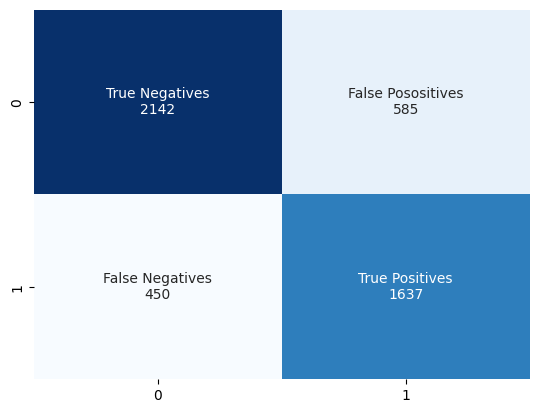

In [18]:
#Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix:")
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ["True Negatives","False Posositives","False Negatives","True Positives"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)

#### Modelo TF-IDF

In [19]:
#Split the data into train and test
target = df['label']

X_train_TF, X_test_TF, y_train_TF, y_test_TF = train_test_split(df_tfidf, target, test_size=0.3, random_state=42)

In [20]:
#Multinomial Naive Bayes model

model_naive_tfidf = MultinomialNB()
model_naive_tfidf.fit(X_train_TF, y_train_TF)

y_pred_TF = model_naive_tfidf.predict(X_test_TF)

Accuracy:  0.8564603240548401
Classification Report:                precision    recall  f1-score   support

           0       0.85      0.90      0.88      2727
           1       0.86      0.80      0.83      2087

    accuracy                           0.86      4814
   macro avg       0.86      0.85      0.85      4814
weighted avg       0.86      0.86      0.86      4814

Confusion Matrix:


<AxesSubplot: >

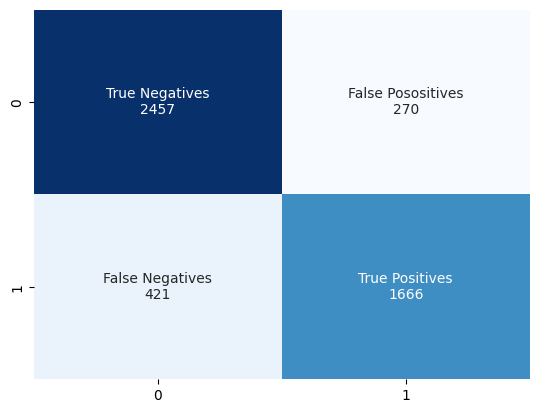

In [21]:
#Evaluate the model
print("Accuracy: ", accuracy_score(y_test_TF, y_pred_TF))
print("Classification Report: ", classification_report(y_test_TF, y_pred_TF))
print("Confusion Matrix:")
cf_matrix = confusion_matrix(y_test_TF, y_pred_TF)
group_names = ["True Negatives","False Posositives","False Negatives","True Positives"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)

# Conclusión
Compare los valores para cada modelo de representación numérico. ¿Qué modelo produjo el mejor 
resultado, BoG o TF-IDF? ¿A que se debe la mejora? Explique los valores obtenidos en las métricas 
para el mejor modelo.

- El TF-IDF es mejor debido a que se le asigna un peso a cada palabra en un documento basado en su frecuencia en el documento y su rareza en la colección de documentos. El modelo TF-IDF es mejor que el modelo de Bolsa de N palabras (BoG) porque considera la importancia de las palabras en un documento, es más flexible y puede capturar mejor la esencia del texto.

- En base a los datos obtenidos podemos observar que TF-IDF tuvo una precisión de 0.85 para el 0 y 0.86 para el 1. Es decir, que el 85% de las veces el modelo econtró un true negative y el 86% de las veces un true positive comparado al BoG con 0.83 y 0.74. Por otro lado el recall es de 0.90 y 0.80 con  TF-IDF vs 0.79 y 0.78 para BoG. Esto quiere decir que se econtraron 90% de datos que cumplen con el requerimiento en el dataset para true negative y 80% para true positive. Ahora comparando los valores de F1 es de esperar que TF-IDF gana por mucho dado a que es el promedio entre el accuracy y el recall y en ambas TF-IDF es el ganador.